<div class="output_png output_subarea output_execute_result">
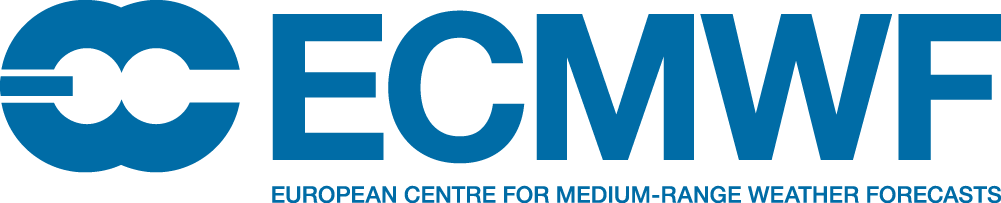
</div>

# 	Significant wave height of all waves with various periods

This notebook will provide you guidance how to explore and plot ECMWF dataset to produce the map from the ECMWF open charts web product.  
The original product can be found on this link: https://apps.ecmwf.int/webapps/opencharts/products/medium-wave-period  


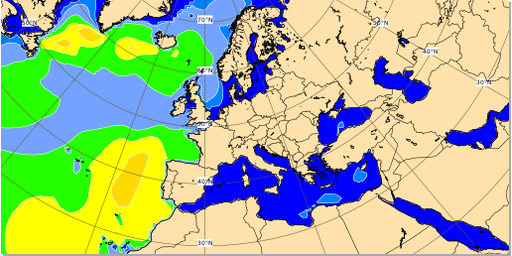

Some ECMWF real-time products are governed by the [ECMWF Standard Licence Agreement](https://www.ecmwf.int/sites/default/files/ECMWF_Standard_Licence.pdf) and are not free or open. Access to these products depends on your use case. To find out which licence applies to you, please visit: [Use cases and licence conditions page](https://www.ecmwf.int/en/forecasts/accessing-forecasts/licences-available).  

To find out how to obtain the access to the ECMWF forecast data please visit our [Access page](https://www.ecmwf.int/en/forecasts/accessing-forecasts).

## Retrieve Data
This product takes one of these 7 parameters as  input:

* [Significant wave height of all waves with periods within the inclusive range from 10 to 12 seconds](https://apps.ecmwf.int/codes/grib/param-db/?id=140114)
* [Significant wave height of all waves with periods within the inclusive range from 12 to 14 seconds](https://apps.ecmwf.int/codes/grib/param-db/?id=140115)
* [Significant wave height of all waves with periods within the inclusive range from 14 to 17 seconds](https://apps.ecmwf.int/codes/grib/param-db/?id=140116)
* [Significant wave height of all waves with periods within the inclusive range from 17 to 21 seconds](https://apps.ecmwf.int/codes/grib/param-db/?id=140117)
* [Significant wave height of all waves with periods within the inclusive range from 21 to 25 seconds](https://apps.ecmwf.int/codes/grib/param-db/?id=140118)
* [Significant wave height of all waves with periods within the inclusive range from 25 to 30 seconds](https://apps.ecmwf.int/codes/grib/param-db/?id=140119)
* [Significant wave height of all waves with period larger than 10s](https://apps.ecmwf.int/codes/grib/param-db/?id=140120)

In this example, we will use: 
- [**ecmwf-api-client**](https://pypi.org/project/ecmwf-api-client/) to download the data
- [**ecmwf.data**](https://github.com/ecmwf/ecmwf-data) library to read and process the data 
- [**magpye**](https://magpye.readthedocs.io) to plot the result

First we need to install them in the current Jupyter kernel:  
<div class="alert alert-block alert-info">
<b>Note:</b> If you are running the notebook on MyBinder or already have the libraries installed, go directly to importing the libraries.
</div>
<div class="alert alert-block alert-info">
<b>Note:</b> If you don't have these libraries installed, click on three dots below, uncomment the code and run the next cell.
</div>

In [ ]:
#!pip install ecmwf-data ecmwf-api-client magpye

In [1]:
import ecmwf.data as ecdata
from magpye import GeoMap
from ecmwfapi import *
import requests

In [2]:
parameters = "140114/140115/140116/140117/140118/140119/140120"
filename = "medium-wave-period.grib"
filename

'medium-wave-period.grib'

If you already have the access to the ECMWF archived forecast data, you can use the next cell to download data from the [MARS archive](https://confluence.ecmwf.int/display/UDOC/MARS+user+documentation):

In [ ]:
server = ECMWFService("mars")
server.execute(
    {
    "class": "od",
    "date": "-1",
    "expver": "1",
    "param": parameters,
    "step": "12",
    "stream": "wave",
    "time": "00",
    "type": "fc",
    "grid": "0.4/0.4"
    },
    filename)

Alternatevly we have prepared a small sample dataset to explore

In [3]:
url = f"https://get.ecmwf.int/repository/opencharts-sample-data/{filename}"
r = requests.get(url)
with open(filename, 'wb') as file:
    file.write(r.content)

## Reading and processing the data
Now we can use **ecmwf.data** to read the file.

In [4]:
data = ecdata.read(filename)

The **describe()** function will give us the overview of the dataset.  

In [5]:
data.describe()

parameter,typeOfLevel,level,date,time,step,paramId,class,stream,type,experimentVersionNumber
h1012,meanSea,0,20220411,0,12,140114,od,wave,fc,0001
h1214,meanSea,0,20220411,0,12,140115,od,wave,fc,0001
h1417,meanSea,0,20220411,0,12,140116,od,wave,fc,0001
h1721,meanSea,0,20220411,0,12,140117,od,wave,fc,0001
h2125,meanSea,0,20220411,0,12,140118,od,wave,fc,0001
h2530,meanSea,0,20220411,0,12,140119,od,wave,fc,0001
sh10,meanSea,0,20220411,0,12,140120,od,wave,fc,0001


And an overview of one parameter, where we can see more information, such as units or type of level.

In [6]:
data.describe('h1012')

shortName,h1012
name,Significant wave height of all waves with periods within the inclusive range from 10 to 12 seconds
paramId,140114
units,m
typeOfLevel,meanSea
level,0
date,20220411
time,0
step,12
class,od
stream,wave


We can use **ls()** function to list all the fields in the file we downloaded.

In [7]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,gridType
Message,,,,,,,,,
0,ecmf,h1012,meanSea,0,20220411,0,12,fc,regular_ll
1,ecmf,h1214,meanSea,0,20220411,0,12,fc,regular_ll
2,ecmf,h1417,meanSea,0,20220411,0,12,fc,regular_ll
3,ecmf,h1721,meanSea,0,20220411,0,12,fc,regular_ll
4,ecmf,h2125,meanSea,0,20220411,0,12,fc,regular_ll
5,ecmf,h2530,meanSea,0,20220411,0,12,fc,regular_ll
6,ecmf,sh10,meanSea,0,20220411,0,12,fc,regular_ll


The grib file contains all the parameters, and we will use the **select()** function to filter one of them.

In [8]:
data_sh10 = data.select(shortName= "sh10")
data_h1012 = data.select(shortName= "h1012")
data_h1214 = data.select(shortName= "h1214")
data_h1417 = data.select(shortName= "h1417")
data_h1721 = data.select(shortName= "h1721")
data_h2125 = data.select(shortName= "h2125")
data_h2530 = data.select(shortName= "h2530")

data_sh10.describe()

parameter,typeOfLevel,level,date,time,step,paramId,class,stream,type,experimentVersionNumber
sh10,meanSea,0,20220411,0,12,140120,od,wave,fc,0001


## Plotting the data
And finally, we can plot the data on the map. 

Since several styles are used to plot these parameters, we will plot a few of them.  
First we plot Significant wave height of all waves with period larger than 10s.

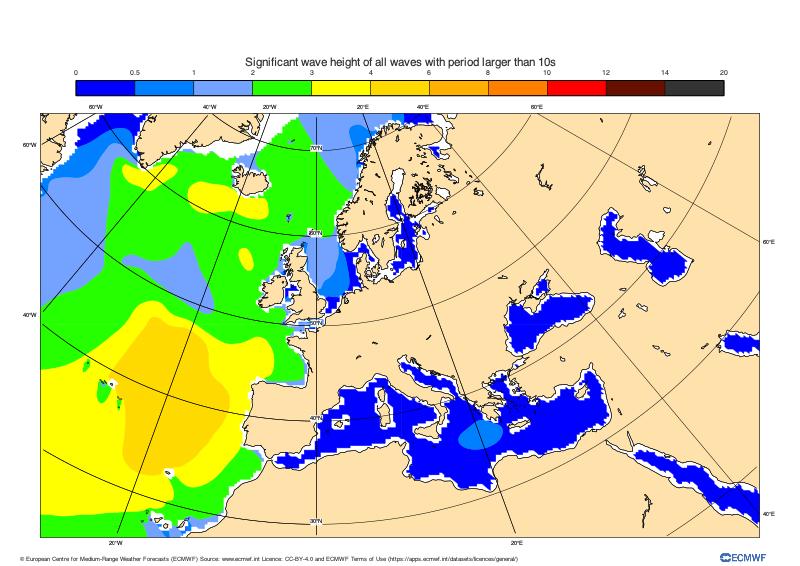

In [9]:
fig = GeoMap(area_name='europe')

fig.coastlines(land_colour="cream",resolution="medium")

fig.contour_shaded(data_sh10, style="wave_period_rainbow")

fig.coastlines(resolution="medium")
fig.gridlines()

fig.title(["Significant wave height of all waves with period larger than 10s",
           "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H' where='shortName=tp'/> ",
           "VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H' where='shortName=tp'/>, STEP: <grib_info key='step' where='shortName=tp' />"])
fig.legend()
fig.footer("© European Centre for Medium-Range Weather Forecasts (ECMWF) Source: www.ecmwf.int Licence: CC-BY-4.0 and ECMWF Terms of Use (https://apps.ecmwf.int/datasets/licences/general/)", logo='ecmwf')

fig.show()

Next is Significant wave height of all waves with periods within the inclusive range from 10 to 12 seconds.  
The same style is for:  
Significant wave height of all waves with periods within the inclusive range from 12 to 14 seconds,  
Significant wave height of all waves with periods within the inclusive range from 14 to 17 seconds and   
Significant wave height of all waves with periods within the inclusive range from 17 to 21 seconds.

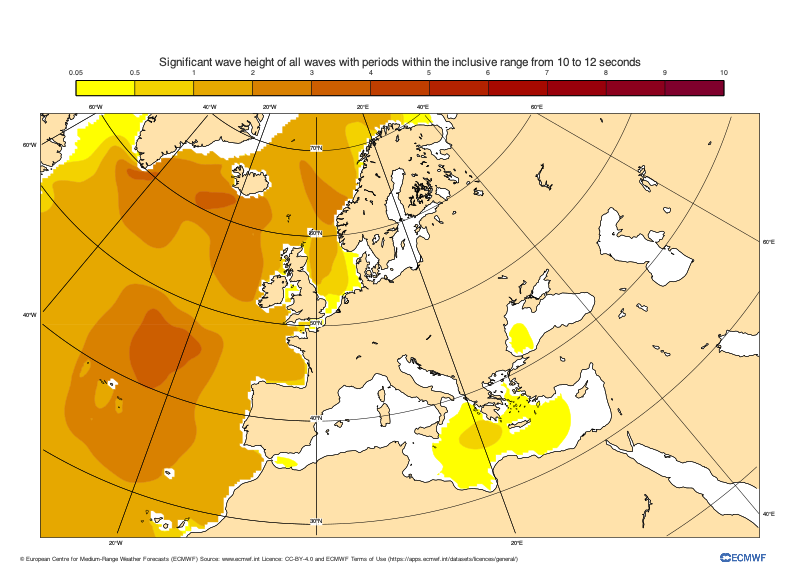

In [10]:
fig = GeoMap(area_name='europe')

fig.coastlines(land_colour="cream",resolution="medium")

fig.contour_shaded(data_h1012, style="wave_period_red")

fig.coastlines(resolution="medium")
fig.gridlines()

fig.title(["Significant wave height of all waves with periods within the inclusive range from 10 to 12 seconds",
           "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H' where='shortName=tp'/> ",
           "VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H' where='shortName=tp'/>, STEP: <grib_info key='step' where='shortName=tp' />"])
fig.legend()
fig.footer("© European Centre for Medium-Range Weather Forecasts (ECMWF) Source: www.ecmwf.int Licence: CC-BY-4.0 and ECMWF Terms of Use (https://apps.ecmwf.int/datasets/licences/general/)", logo='ecmwf')

fig.show()

Next is Significant wave height of all waves with periods within the inclusive range from 21 to 25 seconds.

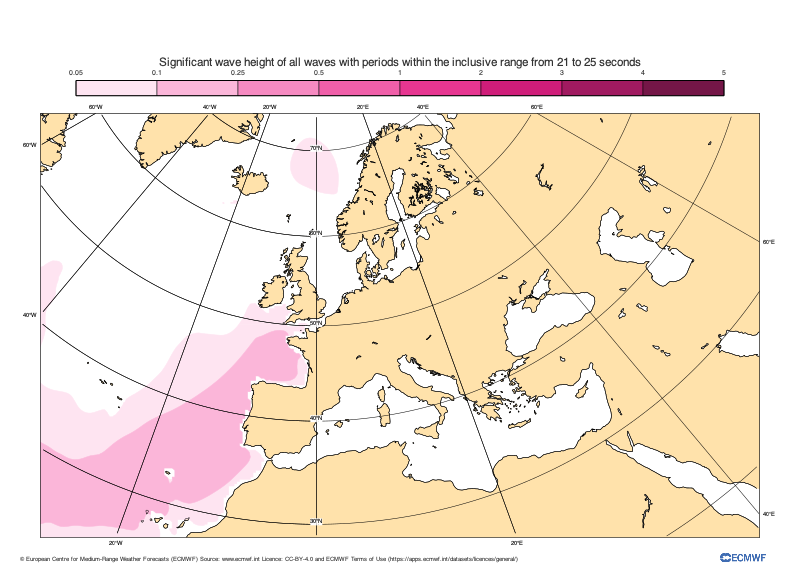

In [11]:
fig = GeoMap(area_name='europe')

fig.coastlines(land_colour="cream",resolution="medium")

fig.contour_shaded(data_h2125, style="wave_period_rose")

fig.coastlines(resolution="medium")
fig.gridlines()

fig.title(["Significant wave height of all waves with periods within the inclusive range from 21 to 25 seconds",
           "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H' where='shortName=tp'/> ",
           "VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H' where='shortName=tp'/>, STEP: <grib_info key='step' where='shortName=tp' />"])
fig.legend()
fig.footer("© European Centre for Medium-Range Weather Forecasts (ECMWF) Source: www.ecmwf.int Licence: CC-BY-4.0 and ECMWF Terms of Use (https://apps.ecmwf.int/datasets/licences/general/)", logo='ecmwf')

fig.show()

The last one is Significant wave height of all waves with periods within the inclusive range from 25 to 30 seconds.

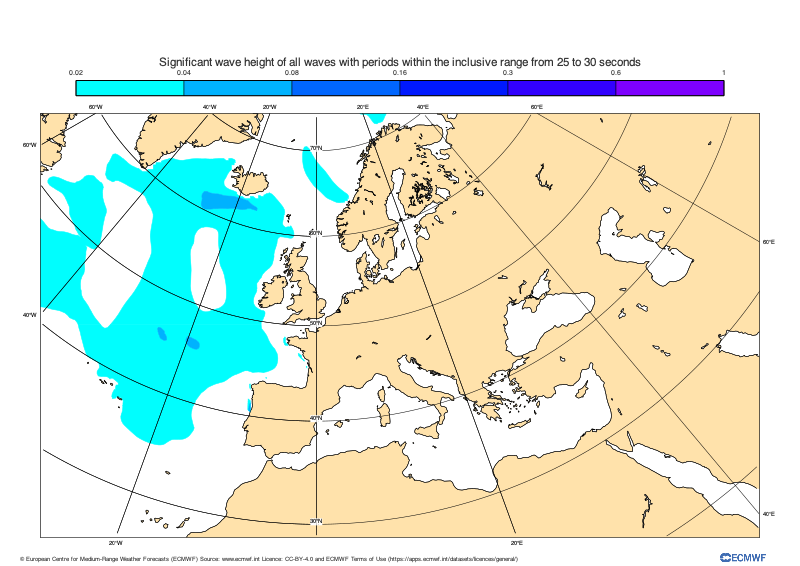

In [12]:
fig = GeoMap(area_name='europe')

fig.coastlines(land_colour="cream",resolution="medium")

fig.contour_shaded(data_h2530, style="wave_period_blue")

fig.coastlines(resolution="medium")
fig.gridlines()

fig.title(["Significant wave height of all waves with periods within the inclusive range from 25 to 30 seconds",
           "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H' where='shortName=tp'/> ",
           "VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H' where='shortName=tp'/>, STEP: <grib_info key='step' where='shortName=tp' />"])
fig.legend()
fig.footer("© European Centre for Medium-Range Weather Forecasts (ECMWF) Source: www.ecmwf.int Licence: CC-BY-4.0 and ECMWF Terms of Use (https://apps.ecmwf.int/datasets/licences/general/)", logo='ecmwf')

fig.show()

Note that plot produced using this dataset will slightly differ from one from Open Charts. This is due to different resolution of the data.  
We downloaded data data on 0.4x0.4 resolution, while high resolution data is 0.1x0.1 grid.